In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv(r"/Users/mpillodi/Documents/GitHub/geonode_extraction/LT_nodes.csv")
df.head()

,bus_id,station_id,voltage,dc,symbol,under_construction,tags,country,fid,visible,cat,name,name_nat,oid,dup,symbol.1,label,tie_line,geom
0,2346,2689,132.0,f,Substation,f,"'""mw""=>""-1""","""country""=>""LT""","""ogc_fid""=>""6029""","""visible""=>""-1""","""category""=>""-1""","""name_eng""=>""Kalveliai""","""name_nat""=>"" ""","""objectid""=>""6388""","""duplicate""=>""1""","""mb_symbol""=>""substation""","""annotation""=>""Kalveliai""","""tie_line_station""=>""1""'",POINT(25.455322 54.489187)
1,3059,3372,300.0,f,Substation,f,"'""mw""=>""-1""","""country""=>""LT""","""ogc_fid""=>""1572""","""visible""=>""-1""","""category""=>""-1""","""name_eng""=>""Klaipƒóda""","""name_nat""=>""Klaipƒóda""","""objectid""=>""1624""","""duplicate""=>""1""","""mb_symbol""=>""substation""","""annotation""=>""Klaipƒóda""","""tie_line_station""=>""1""'",POINT(21.126709 55.758032)
2,3060,3373,300.0,f,Substation,f,"'""mw""=>""-1""","""country""=>""LT""","""ogc_fid""=>""1573""","""visible""=>""-1""","""category""=>""-1""","""name_eng""=>""Bitƒónai""","""name_nat""=>""–ë–∏—Ç–µ–Ω–∞–π""","""objectid""=>""1625""","""duplicate""=>""1""","""mb_symbol""=>""substation""","""annotation""=>""Bitƒónai""","""tie_line_station""=>""1""'",POINT(21.983643 55.185141)
3,3061,3374,300.0,f,Substation,f,"'""mw""=>""-1""","""country""=>""LT""","""ogc_fid""=>""1574""","""visible""=>""-1""","""category""=>""-1""","""name_eng""=>""Kaunas""","""name_nat""=>"" ""","""objectid""=>""1626""","""duplicate""=>""1""","""mb_symbol""=>""substation""","""annotation""=>""Kaunas""'",POINT(23.763428 54.933454),POINT(23.763428 54.933454)
4,3062,3375,300.0,f,Substation,f,"'""mw""=>""-1""","""country""=>""LT""","""ogc_fid""=>""1575""","""visible""=>""-1""","""category""=>""-1""","""name_eng""=>""Jurbarkas""","""name_nat""=>"" ""","""objectid""=>""1627""","""duplicate""=>""1""","""mb_symbol""=>""substation""","""annotation""=>""Jurbarkas""'",POINT(22.840576 55.090944),POINT(22.840576 55.090944)


In [3]:
df.columns.values

array(['bus_id', 'station_id', 'voltage', 'dc', 'symbol',
       'under_construction', 'tags', 'country', 'fid', 'visible', 'cat',
       'name', 'name_nat', 'oid', 'dup', 'symbol.1', 'label', 'tie_line',
       'geom'], dtype=object)

In [4]:
from shapely import Point
def point(x):
    point_str = str(x).split("(")
    tuple_coords = point_str[1].split(")")
    pt = tuple_coords[0].split(" ")
    return Point(pt[0], pt[1])

In [5]:
df["country"] = df["country"].apply(lambda x: str(x.replace('"country"=>',"")))
df["country"] = df["country"].apply(lambda x: x.strip('" '))
df["country"] = df["country"].apply(lambda x: str(x))

df["oid"] = df["oid"].apply(lambda x: str(x.replace('"objectid"=>',"")))
df["oid"] = df["oid"].apply(lambda x: x.strip('" '))
df["oid"] = df["oid"].apply(lambda x: int(x))

df["fid"] = df["fid"].apply(lambda x: str(x.replace('"ogc_fid"=>',"")))
df["fid"] = df["fid"].apply(lambda x: x.strip('" '))
df["fid"] = df["fid"].apply(lambda x: int(x))

df["name"] = df["name"].apply(lambda x: str(x.replace('"name_eng"=>',"")))
df["name"] = df["name"].apply(lambda x: x.strip('" '))
df["name"] = df["name"].apply(lambda x: str(x))

df["geom"] = df["geom"].apply(lambda x: point(x))

df = df.drop(columns = ["name_nat", "dup", "visible", "cat", "symbol.1", "label", "tie_line", "tags", 
                        "under_construction", "dc"])

In [6]:
df.columns.values

array(['bus_id', 'station_id', 'voltage', 'symbol', 'country', 'fid',
       'name', 'oid', 'geom'], dtype=object)

In [7]:
gdf = gpd.GeoDataFrame(data = df[['bus_id', 'station_id', 'voltage', 'symbol', 'country', 'fid',
       'name', 'oid']], geometry = df["geom"])

In [8]:
gdf.head()

,bus_id,station_id,voltage,symbol,country,fid,name,oid,geometry
0,2346,2689,132.0,Substation,LT,6029,Kalveliai,6388,POINT (25.45532 54.48919)
1,3059,3372,300.0,Substation,LT,1572,Klaipƒóda,1624,POINT (21.12671 55.75803)
2,3060,3373,300.0,Substation,LT,1573,Bitƒónai,1625,POINT (21.98364 55.18514)
3,3061,3374,300.0,Substation,LT,1574,Kaunas,1626,POINT (23.76343 54.93345)
4,3062,3375,300.0,Substation,LT,1575,Jurbarkas,1627,POINT (22.84058 55.09094)


<Axes: >

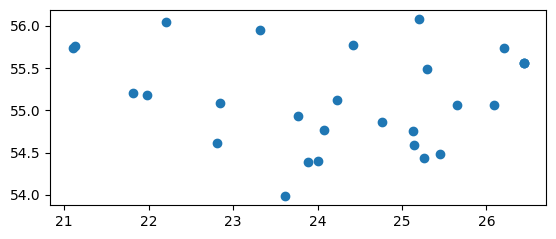

In [9]:
gdf.plot()

In [10]:
gdf.explore()

In [18]:
output_file = '/Users/mpillodi/Documents/GitHub/geonode_extraction/geonodes_green_network.xlsx'
gdf.to_excel(output_file, index=False, sheet_name = 'Sheet1')